Importando bibliotecas necessárias para o modelo de Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

Lendo arquivo .csv (Synthetic_Financial_datasets_log)

In [2]:
df = pd.read_csv("Synthetic_Financial_datasets_log.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Realizando limpeza de valores nulos

In [3]:
df = df.dropna(subset=[
    'step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
    'oldbalanceDest', 'newbalanceDest', 'isFraud'
])
df.shape

(6362620, 11)

Codificando variáveis categóricas

In [4]:
le_type = LabelEncoder()
df['type_encoded'] = le_type.fit_transform(df['type'])

Criando variáveis derivadas

In [5]:
df['isMerchant'] = df['nameDest'].astype(str).str.startswith('M').astype(int)

Selecionando features e target

In [6]:
features = ['step', 'type_encoded', 'amount', 'isMerchant']
X = df[features]
y = df['isFraud']

Divisão dos dados entre treinamento e teste

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train.shape

(5090096, 4)

In [9]:
X_test.shape

(1272524, 4)

Treinando o modelo Logistic Regression (SEM SMOTE)

In [10]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

Realizando previsões (SEM SMOTE)

In [11]:
y_pred_proba = lr_model.predict_proba(X_test)[:, 1]
y_pred_binary = (y_pred_proba >= 0.7).astype(int)

Avaliando desempenho do modelo (SEM SMOTE)

In [12]:
print("Relatório de Classificação (SEM SMOTE):")
print(classification_report(y_test, y_pred_binary))

print("Matriz de Confusão (SEM SMOTE):")
print(confusion_matrix(y_test, y_pred_binary))

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC (SEM SMOTE): {roc_auc:.4f}")

Relatório de Classificação (SEM SMOTE):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.00      0.00      0.00      1620

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524

Matriz de Confusão (SEM SMOTE):
[[1270891      13]
 [   1620       0]]
AUC-ROC (SEM SMOTE): 0.8107


Visualização das previsões (SEM SMOTE)

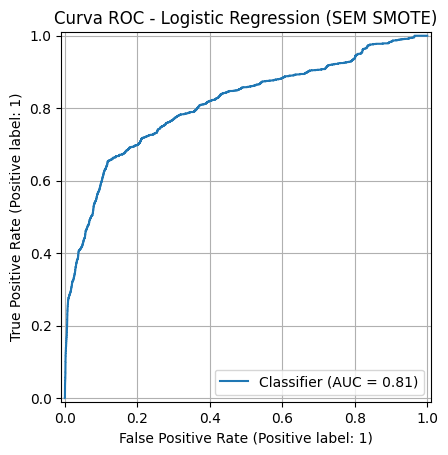

In [13]:
RocCurveDisplay.from_predictions(y_test, y_pred_proba)
plt.title("Curva ROC - Logistic Regression (SEM SMOTE)")
plt.grid(True)
plt.show()

Aplicando SMOTE nos dados de treino

In [14]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Treinando o modelo Logistic Regression (COM SMOTE)

In [15]:
lr_model_smote = LogisticRegression(max_iter=1000, random_state=42)
lr_model_smote.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000, random_state=42)

Realizando previsões (COM SMOTE)

In [16]:
y_pred_proba_smote = lr_model_smote.predict_proba(X_test)[:, 1]
y_pred_binary_smote = (y_pred_proba_smote >= 0.7).astype(int)

Avaliando desempenho do modelo (COM SMOTE)

In [17]:
print("Relatório de Classificação (COM SMOTE):")
print(classification_report(y_test, y_pred_binary_smote))

print("Matriz de Confusão (COM SMOTE):")
print(confusion_matrix(y_test, y_pred_binary_smote))

roc_auc_smote = roc_auc_score(y_test, y_pred_proba_smote)
print(f"AUC-ROC (COM SMOTE): {roc_auc_smote:.4f}")

Relatório de Classificação (COM SMOTE):
              precision    recall  f1-score   support

           0       1.00      0.92      0.96   1270904
           1       0.01      0.68      0.02      1620

    accuracy                           0.92   1272524
   macro avg       0.50      0.80      0.49   1272524
weighted avg       1.00      0.92      0.95   1272524

Matriz de Confusão (COM SMOTE):
[[1163838  107066]
 [    526    1094]]
AUC-ROC (COM SMOTE): 0.9067


Visualização das previsões (COM SMOTE)

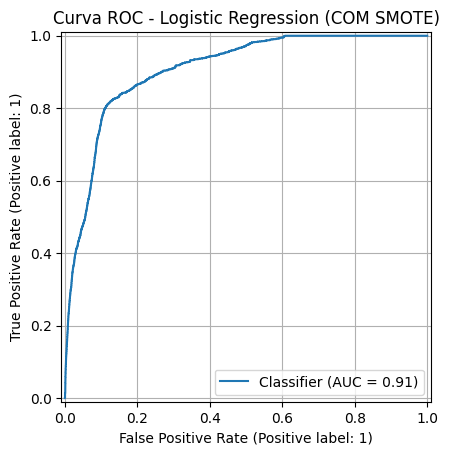

In [18]:
RocCurveDisplay.from_predictions(y_test, y_pred_proba_smote)
plt.title("Curva ROC - Logistic Regression (COM SMOTE)")
plt.grid(True)
plt.show()